<a href="https://colab.research.google.com/github/partho2001/fashion_image_denoising/blob/main/Denoising_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [9]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

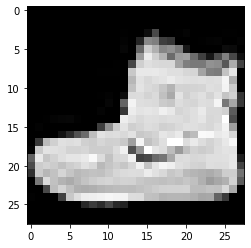

In [10]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [11]:
# check out the shape of the training data
print(X_train.shape)

(60000, 28, 28)


In [12]:
# check out the shape of the testing data
print(X_test.shape)

(10000, 28, 28)


In [13]:
print(y_train.shape)

(60000,)


In [14]:
print(y_test.shape)

(10000,)


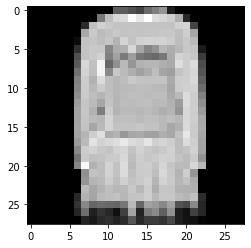

In [15]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap='gray')

In [16]:
label = y_train[i]
label

3

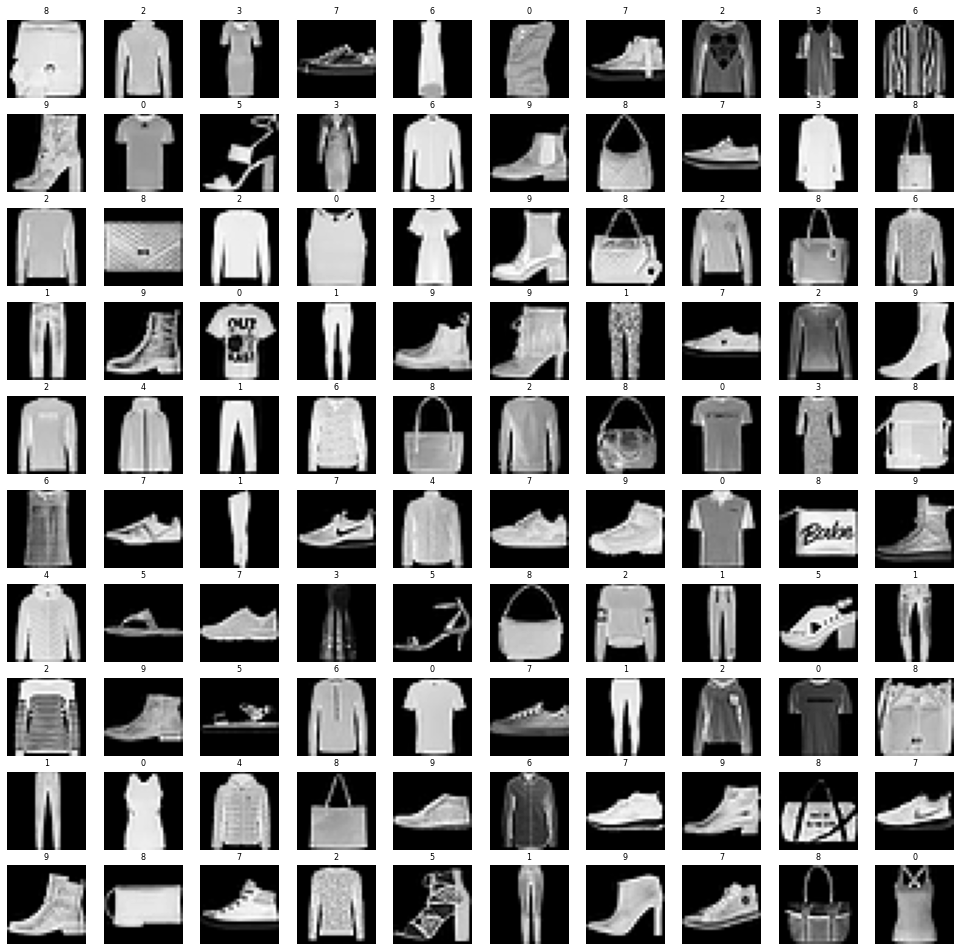

In [17]:
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

In [18]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [19]:
# add some noise
noise_factor = 0.3
noise_dataset = []
for img in X_train:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

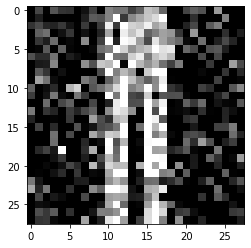

In [20]:
plt.imshow(noise_dataset[69], cmap='gray')

In [21]:
noise_dataset = np.array(noise_dataset)

In [22]:
# add noise to testing dataset
noise_factor = 0.3
noise_test_dataset = []
for img in X_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [23]:
noise_test_dataset = np.array(noise_test_dataset)

In [24]:
autoencoder = tf.keras.models.Sequential()
# encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

# decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same'))
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainabl

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 16s 50ms/step - loss: 0.4014 - val_loss: 0.3274
Epoch 2/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3185 - val_loss: 0.3161
Epoch 3/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3114 - val_loss: 0.3116
Epoch 4/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3079 - val_loss: 0.3086
Epoch 5/10
300/300 [==============================] - 15s 52ms/step - loss: 0.3053 - val_loss: 0.3065
Epoch 6/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3037 - val_loss: 0.3053
Epoch 7/10
300/300 [==============================] - 15s 52ms/step - loss: 0.3026 - val_loss: 0.3043
Epoch 8/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3019 - val_loss: 0.3037
Epoch 9/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3014 - val_loss: 0.3032
Epoch 10/10
300/300 [==============================] - 16s 52ms/step - loss: 0.301

In [27]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('Testing Loss: {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 6ms/step - loss: 0.3029
Testing Loss: 0.303


In [28]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

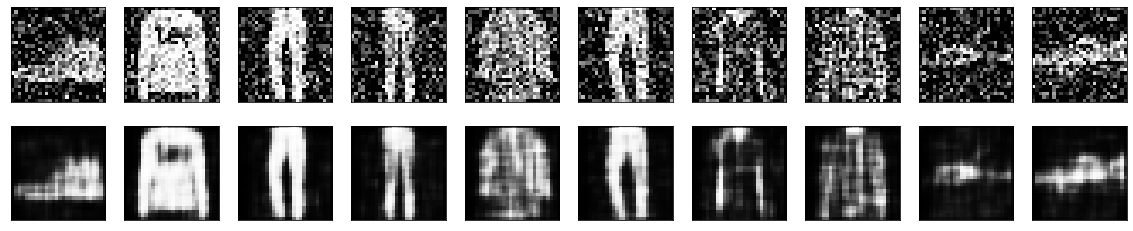

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)